<a href="https://colab.research.google.com/github/Sibgat-Ul/Road_Accidents_Pakistan_Prediction/blob/main/toonsquad_445_7_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group_Name: ToonSquad
    - Imroz Rahim - 2011129
    - Iffaat Ara Mehnaz - 2031340
    - Sibgat Ul Islam - 2111920

### Import the libraries

In [182]:
import pandas as pd
import numpy as np
from openpyxl.styles.builtins import total

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

import warnings
import nltk

warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt')
nltk.download('punkt_tab')


print(nltk.data.path)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
['/root/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/kaggle/working/nltk_data']


In [183]:
# Importing the dataset

# rta_dataset = pd.read_excel('./data/RTA Data 2020 to July 2023.xlsx')

rta_dataset = pd.read_excel('/kaggle/input/rta-dataset/data/RTA Data 2020 to July 2023.xlsx')

#### Few helper functions:

In [184]:
from collections import Counter
from nltk.corpus import stopwords

def get_cat_cols(df: pd.DataFrame) -> list:
    """"
    :param df: Dataframe
    :return: list of column names

    to get categorical columns
    """
    return [col for col in df.columns if df[col].dtype == 'object']

def get_num_cols(df):
    """"
    :param df: Dataframe
    :return: list of column names

    to get num columns
    """
    return [col for col in df.columns if df[col].dtype != 'object']

def get_info(dataset: pd.DataFrame):
    """

    :param dataset: pd.DataFrame
    :return: pd.DataFrame

    Makes a new df with missing and unique values.
    """
    new_df = pd.DataFrame()
    new_df['missing_count'] = dataset.isnull().sum()
    new_df['total'] = dataset.shape[0]
    new_df['missing%'] = (dataset.isnull().sum() / dataset.shape[0])*100
    new_df['n_unique'] = dataset.nunique()
    new_df['type'] = dataset.dtypes
    print(f"Size: {rta_dataset.shape}")
    return new_df

def plot_by_status(col_to_plot, to_encode_dict):
    freq_counter = [
        {
            status:
              Counter(
                  rta_dataset[rta_dataset['PatientStatus'] == status][col_to_plot].values
                  )
              } for status in to_encode_dict[4]['PatientStatus']
    ]

    d_list = freq_counter[2]['Dead'].most_common()[:20]
    u_list = freq_counter[0]['Alive & unstable'].most_common()[:20]
    s_list = freq_counter[1]['Alive & stable'].most_common()[:20]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
    plt.subplots_adjust(hspace=.5)
    rotate = 90

    plot1 = sns.barplot(x=[x[0] for x in d_list], y=[x[1] for x in d_list], ax=axes[0])
    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=rotate)
    plot1.set_title('Dead')

    plot2 = sns.barplot(x=[x[0] for x in u_list], y=[x[1] for x in u_list], ax=axes[1])
    plot2.set_xticklabels(plot2.get_xticklabels(), rotation=rotate)
    plot2.set_title('Unstable')

    plot3 = sns.barplot(x=[x[0] for x in s_list], y=[x[1] for x in s_list], ax=axes[2])
    plot3.set_xticklabels(plot3.get_xticklabels(), rotation=rotate)
    plot3.set_title('Stable')

In [185]:
cat_cols = get_cat_cols(rta_dataset)
num_cols = get_num_cols(rta_dataset)

### Some info of the dataset

In [186]:
info_df = get_info(rta_dataset)
info_df

Size: (46189, 25)


,missing_count,total,missing%,n_unique,type
EcYear,0,46189,0.000000,5,object
EcNumber,7211,46189,15.611942,34800,object
CallTime,5956,46189,12.894845,40170,datetime64[ns]
EmergencyArea,1,46189,0.002165,37520,object
TotalPatientsInEmergency,0,46189,0.000000,13,object
Gender,1,46189,0.002165,4,object
Age,1,46189,0.002165,100,float64
HospitalName,21950,46189,47.522137,162,object
Reason,1,46189,0.002165,23940,object
responsetime,5,46189,0.010825,68,float64



#### Checking the unique values

In [187]:
target_column = 'PatientStatus'

filtered_cols = rta_dataset[info_df[info_df['n_unique'] < 15].index]
unique_values = [{f'{col}: {rta_dataset[col].unique()}'} for col in filtered_cols.columns]
unique_values

[{"EcYear: [2020 2021 2022 'Hospital' 2023]"},
 {"TotalPatientsInEmergency: [1 2 3 4 8 6 5 10 7 11 9 'Alive & unstable' 15]"},
 {"Gender: ['Male' 'Female' 'Other' nan 0]"},
 {"EducationTitle: ['Intermediate' 'Illetrate' 'Matric' 'Primary' 'Graduation' 'Masters'\n 'Middle' 'PHD' nan 0]"},
 {"InjuryType: ['Minor' 'Single Fracture' 'Head Injury' 'Multiple Fractures'\n 'Spinal Injury' nan]"},
 {"Cause: ['Over Speed' 'Carelessness' 'Tyre Burst' 'U Turn' 'Others' 'Wrong Turn'\n 'One Wheeling' nan]"},
 {"PatientStatus: ['Alive & unstable' 'Alive & stable' 'Dead' nan]"},
 {'BicycleInvovled: [ 0.  1.  2. nan]'},
 {'BikesInvolved: [ 1.  0.  2.  3. 10. nan]'},
 {'BusesInvolved: [ 0.  1.  2. nan]'},
 {'CarsInvolved: [ 0.  1.  2.  3.  4. nan  5.]'},
 {'CartInvovled: [ 0.  1. nan]'},
 {'RickshawsInvolved: [ 0.  1.  2. nan]'},
 {'TractorInvovled: [ 0.  1. nan]'},
 {'TrainsInvovled: [ 0.  1. nan]'},
 {'TrucksInvolved: [ 0.  1.  2.  3. nan]'},
 {'VansInvolved: [ 0.  1.  2.  4.  3. nan]'},
 {'OthersInvo

### Missing value processing
- We will drop the columns with the most missing values
- drop the rows having problematic values (EcYear with Hospital, 0 for Gender)

We have considered dropping rather than filling the values because there are enough samples available.

In [188]:
def drop_garbage_rows(df, col, to_drop):
    df.drop(index=df[df[col] == to_drop].index, axis=0, inplace=True)

drop_garbage_rows(rta_dataset, "EcYear", "Hospital")
drop_garbage_rows(rta_dataset, "Gender", 0)
drop_garbage_rows(rta_dataset, "TotalPatientsInEmergency", 'Alive & unstable')
drop_garbage_rows(rta_dataset, "EducationTitle", 0)

In [189]:
rta_dataset.drop(columns=['HospitalName', 'EcNumber'], axis="columns", inplace=True)

In [190]:
get_info(rta_dataset)

Size: (46188, 23)


,missing_count,total,missing%,n_unique,type
EcYear,0,46188,0.000000,4,object
CallTime,5956,46188,12.895124,40169,datetime64[ns]
EmergencyArea,1,46188,0.002165,37519,object
TotalPatientsInEmergency,0,46188,0.000000,12,object
Gender,1,46188,0.002165,3,object
Age,1,46188,0.002165,100,float64
Reason,1,46188,0.002165,23939,object
responsetime,5,46188,0.010825,68,float64
EducationTitle,1,46188,0.002165,8,object
InjuryType,1,46188,0.002165,5,object


#### We will drop the values where the patient status is not Dead, because we have low samples of DEAD

In [191]:
to_drop = rta_dataset[(rta_dataset['CallTime'].isnull()) & (rta_dataset["PatientStatus"]!="Dead")]
to_drop.shape

(5825, 23)

In [192]:
rta_dataset.drop(index=to_drop.index, inplace=True)

#### More problematic rows

In [193]:
rta_dataset[rta_dataset["PatientStatus"].isnull()]

,EcYear,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
31355,2022,2022-06-18 13:23:00,"Near 502 Park, Adyala Road Rawalpindi.",2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
rta_dataset[rta_dataset["InjuryType"].isnull()]

,EcYear,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
31355,2022,2022-06-18 13:23:00,"Near 502 Park, Adyala Road Rawalpindi.",2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
# Another problematic row
rta_dataset[rta_dataset["Gender"].isnull()]

,EcYear,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
31355,2022,2022-06-18 13:23:00,"Near 502 Park, Adyala Road Rawalpindi.",2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
rta_dataset.shape

(40363, 23)

In [197]:
rta_dataset.drop(index=rta_dataset[rta_dataset["Gender"].isnull()].index, inplace=True)
rta_dataset.drop(index=rta_dataset[rta_dataset["InjuryType"].isnull()].index, inplace=True)
rta_dataset.shape

(40362, 23)

In [198]:
get_info(rta_dataset)

Size: (40362, 23)


,missing_count,total,missing%,n_unique,type
EcYear,0,40362,0.000000,4,object
CallTime,131,40362,0.324563,40168,datetime64[ns]
EmergencyArea,1,40362,0.002478,37242,object
TotalPatientsInEmergency,0,40362,0.000000,12,object
Gender,0,40362,0.000000,3,object
Age,0,40362,0.000000,98,float64
Reason,0,40362,0.000000,22072,object
responsetime,3,40362,0.007433,68,float64
EducationTitle,0,40362,0.000000,8,object
InjuryType,0,40362,0.000000,5,object


In [199]:
rta_dataset[rta_dataset["EmergencyArea"].isnull()][["PatientStatus", "InjuryType"]]

,PatientStatus,InjuryType
41936,Alive & unstable,Minor


In [200]:
rta_dataset.drop(index=rta_dataset[rta_dataset["EmergencyArea"].isnull()].index, inplace=True)

In [201]:
get_info(rta_dataset)

Size: (40361, 23)


,missing_count,total,missing%,n_unique,type
EcYear,0,40361,0.000000,4,object
CallTime,131,40361,0.324571,40167,datetime64[ns]
EmergencyArea,0,40361,0.000000,37242,object
TotalPatientsInEmergency,0,40361,0.000000,12,object
Gender,0,40361,0.000000,3,object
Age,0,40361,0.000000,98,float64
Reason,0,40361,0.000000,22071,object
responsetime,3,40361,0.007433,68,float64
EducationTitle,0,40361,0.000000,8,object
InjuryType,0,40361,0.000000,5,object


### Working with the CallTime and imputing the missing values for the column which has samples for "Dead"

In [202]:
rta_dataset['CallTime'] = pd.DatetimeIndex(rta_dataset['CallTime'])
rta_dataset['CallHour'] = rta_dataset['CallTime'].dt.hour
rta_dataset['CallDayOfWeek'] = rta_dataset['CallTime'].dt.dayofweek
rta_dataset['CallMonth'] = rta_dataset['CallTime'].dt.month
rta_dataset['CallYear'] = rta_dataset['CallTime'].dt.year
rta_dataset.drop(columns=['CallTime', 'CallYear', 'EcYear'], inplace=True)

cat_cols = get_cat_cols(rta_dataset)
num_cols = get_num_cols(rta_dataset)

In [203]:
from sklearn.impute import KNNImputer
to_impute = ["CallHour", "CallDayOfWeek", "CallMonth", "responsetime"]

imputer = KNNImputer(n_neighbors=1)
rta_dataset[to_impute] = imputer.fit_transform(rta_dataset[to_impute])

In [204]:
get_info(rta_dataset)

Size: (40361, 24)


,missing_count,total,missing%,n_unique,type
EmergencyArea,0,40361,0.0,37242,object
TotalPatientsInEmergency,0,40361,0.0,12,object
Gender,0,40361,0.0,3,object
Age,0,40361,0.0,98,float64
Reason,0,40361,0.0,22071,object
responsetime,0,40361,0.0,68,float64
EducationTitle,0,40361,0.0,8,object
InjuryType,0,40361,0.0,5,object
Cause,0,40361,0.0,7,object
PatientStatus,0,40361,0.0,3,object


### Plotting

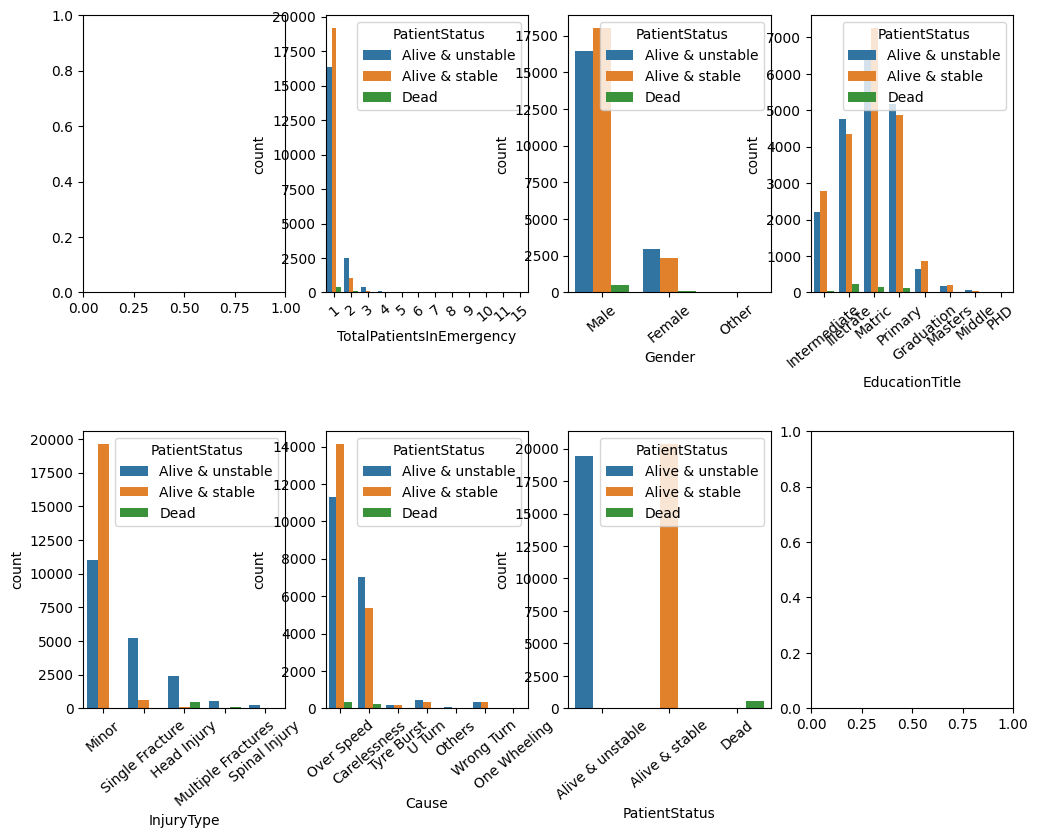

In [205]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in filtered_cols:
    if col in cat_cols:
        plot = sns.countplot(data=rta_dataset, x=rta_dataset[col], hue='PatientStatus', ax=axes[r, c])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=40)

    if c < 3:
        c = c + 1
    else:
        c = 0
        if r < 1:
            r = r + 1

plt.show()

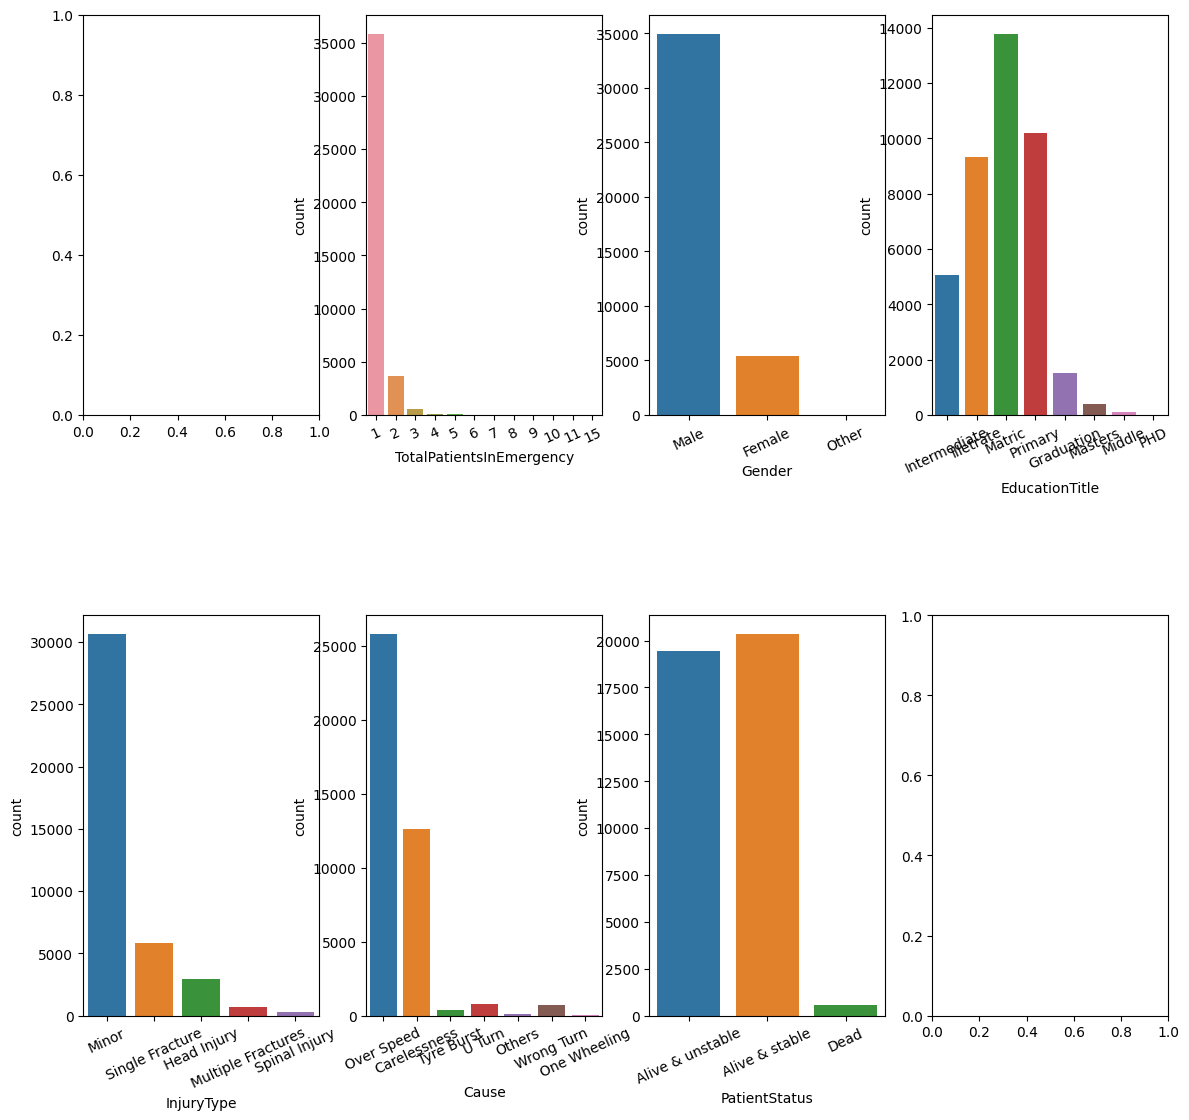

In [206]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 13))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in filtered_cols.columns:
    if col in cat_cols:
        plot = sns.countplot(data=rta_dataset, x=rta_dataset[col], ax=axes[r, c])
        plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
    if c < 3:
        c = c + 1
    else:
        c = 0
        if r < 1:
            r = r + 1

plt.show()

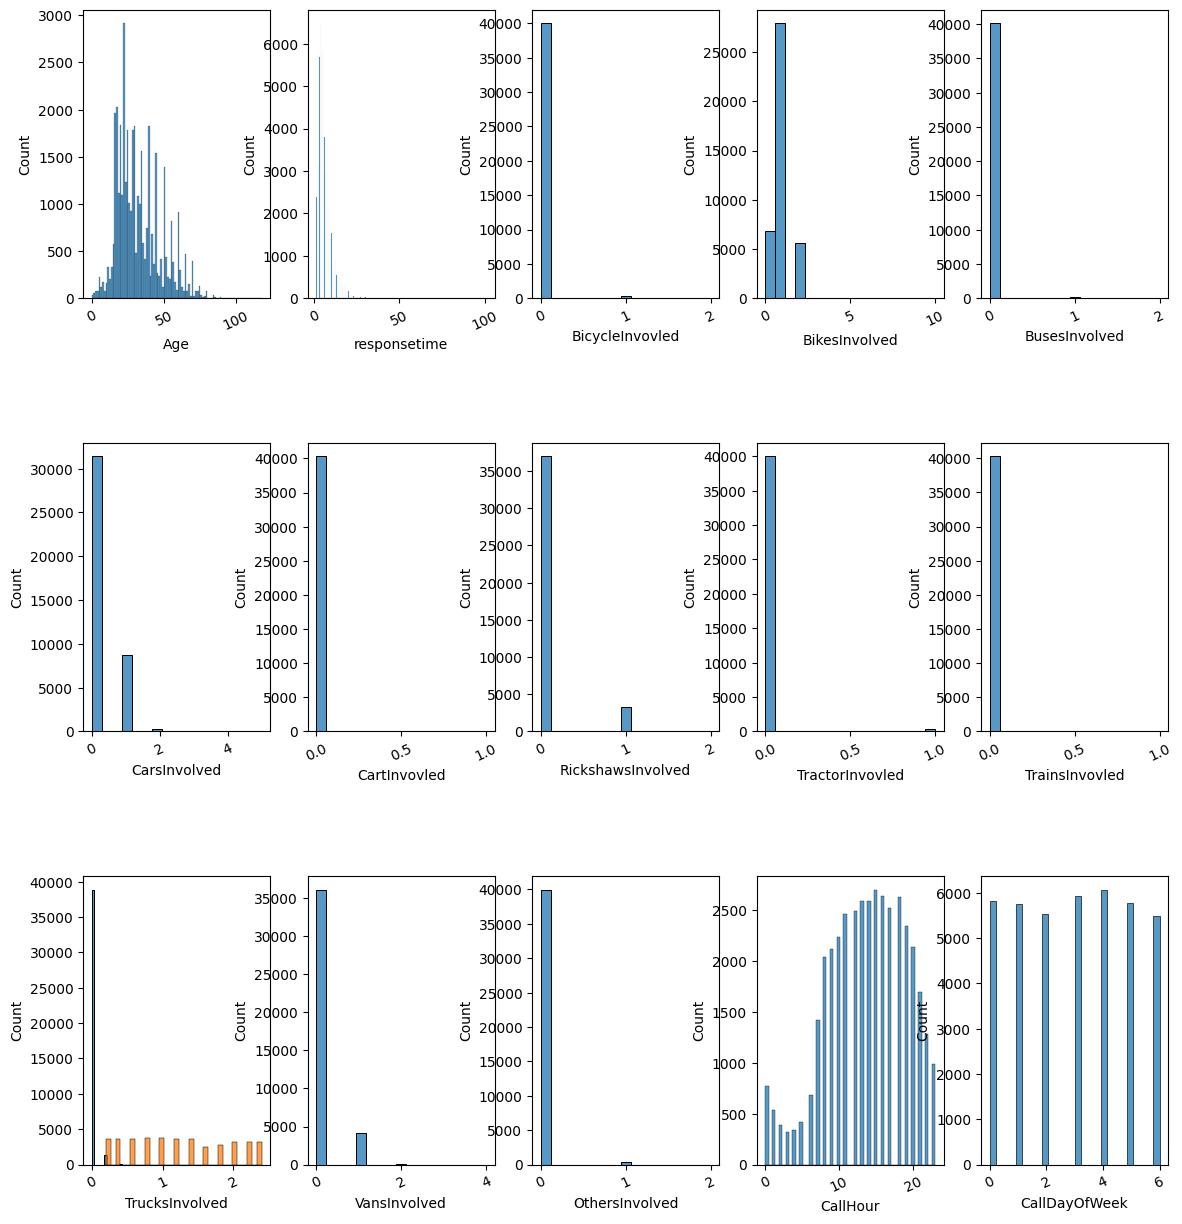

In [207]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(14, 15))
plt.subplots_adjust(hspace=.5)

r, c = 0, 0

for col in num_cols:
    plot = sns.histplot(data=rta_dataset, x=col, ax=axes[r, c])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25)
    if c < 4:
        c = c + 1
    else:
        c = 0
        if r < 2:
            r = r + 1


In [208]:
rta_dataset.columns

Index(['EmergencyArea', 'TotalPatientsInEmergency', 'Gender', 'Age', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved',
       'CallHour', 'CallDayOfWeek', 'CallMonth'],
      dtype='object')

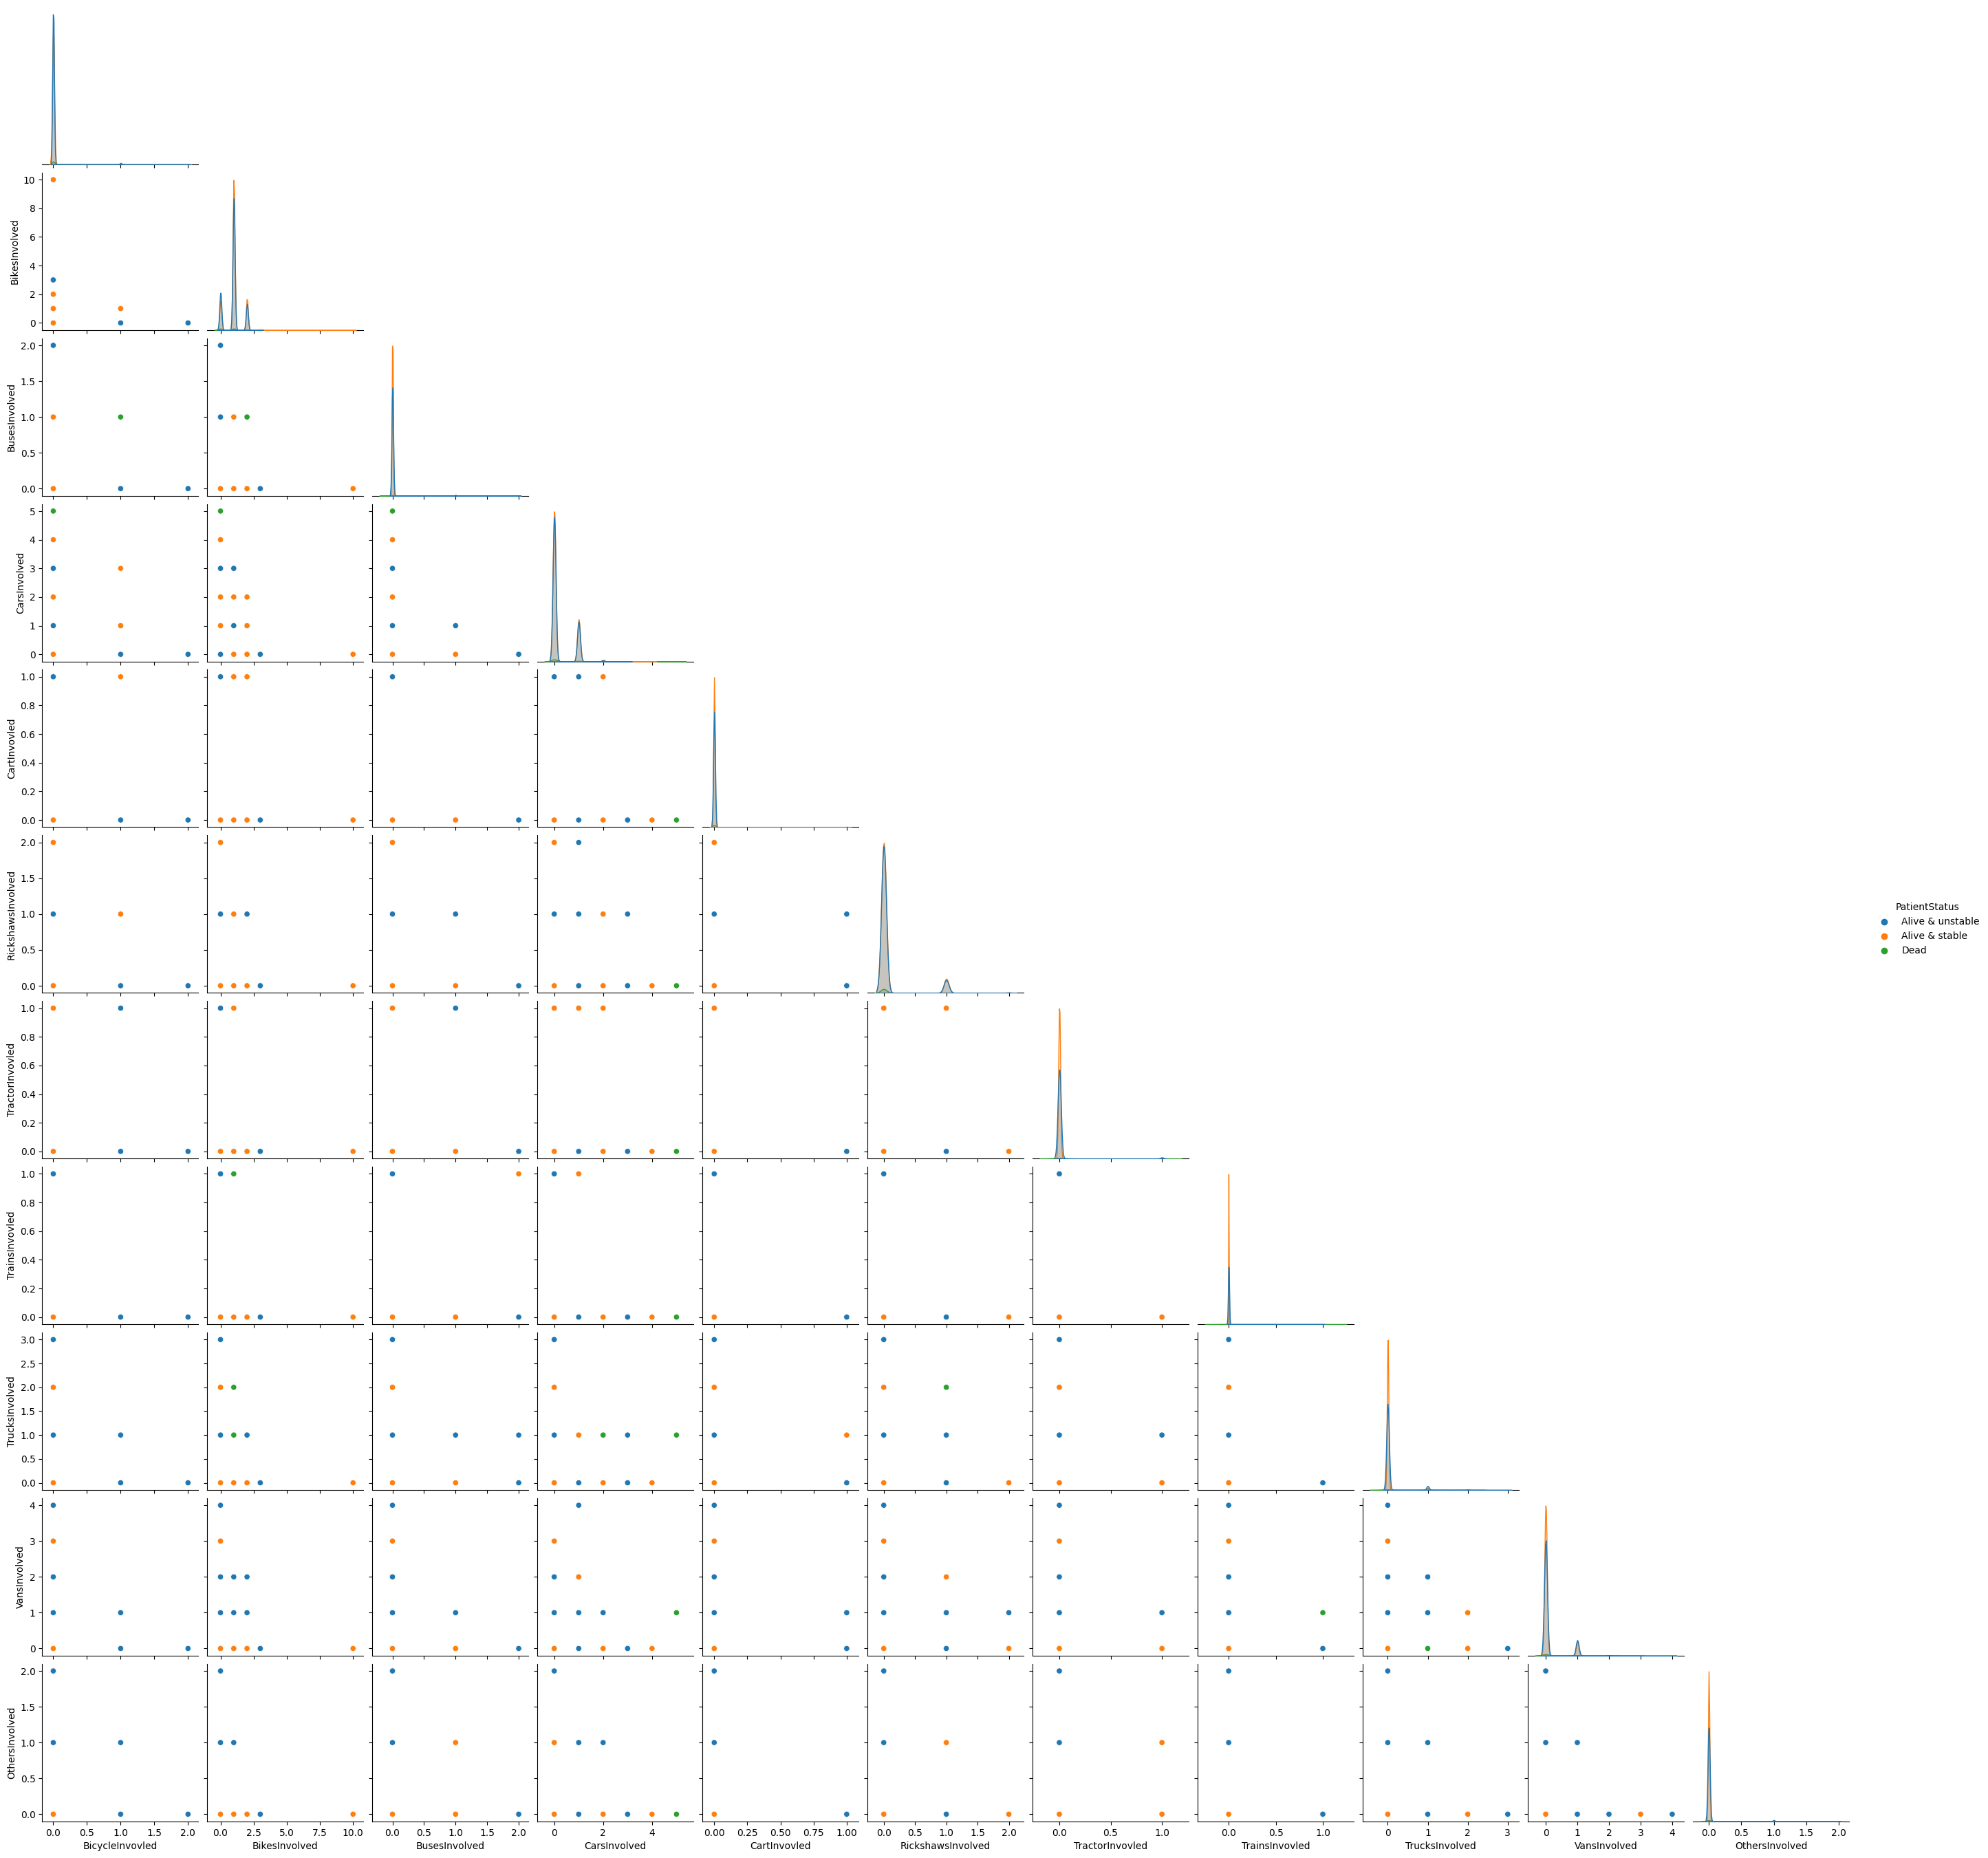

In [27]:
vehicle_wise_cols = ['BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved', "PatientStatus", "InjuryType"]

sns.pairplot(data=rta_dataset[vehicle_wise_cols], hue="PatientStatus", corner=True)

# plot3 = sns.countplot(data=rta_dataset, x='CallTime', hue='PatientStatus', ax=axes[1,0])
# plot3.set_xticklabels(plot3.get_xticklabels(), rotation=80)

# sns.countplot(data=rta_dataset, x='PatientStatus', hue='Gender', ax=axes[1,1])

In [209]:
sns.pairplot(data=rta_dataset[vehicle_wise_cols], hue="InjuryType", corner=True)

NameError: name 'vehicle_wise_cols' is not defined

<Axes: >

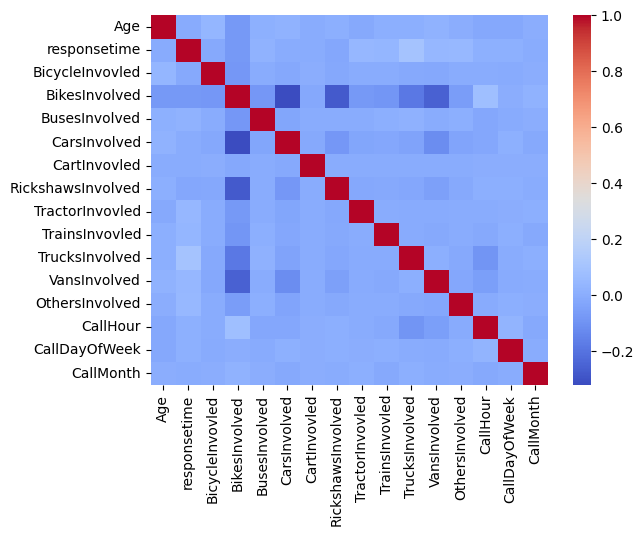

In [210]:
sns.heatmap(rta_dataset[num_cols].corr(), cmap='coolwarm')

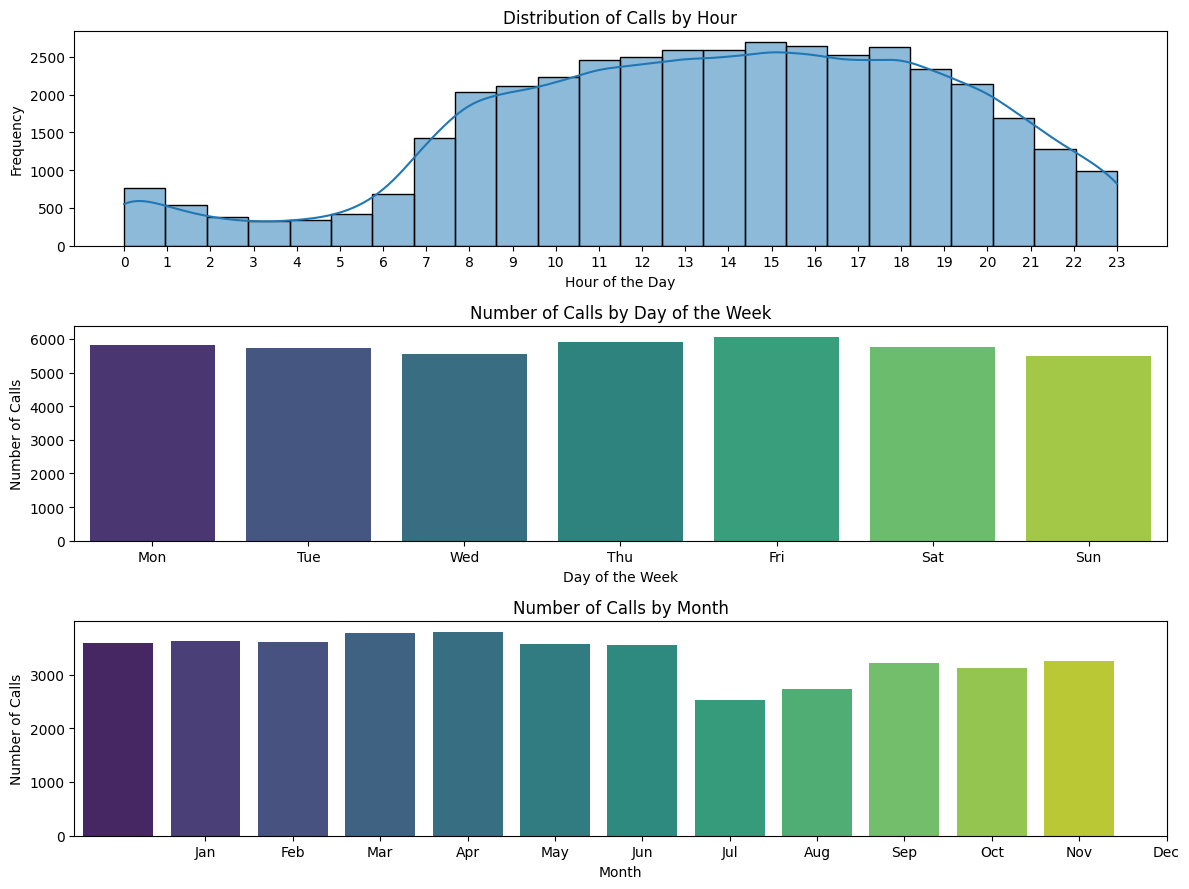

In [211]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

# Plot calls by hour
sns.histplot(rta_dataset['CallHour'], bins=24, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Calls by Hour')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(0, 24))

# Plot calls by day of the week
sns.countplot(x='CallDayOfWeek', data=rta_dataset, palette='viridis', ax=axes[1])
axes[1].set_title('Number of Calls by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Calls')
axes[1].set_xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot calls by month
sns.countplot(x='CallMonth', data=rta_dataset, palette='viridis', ax=axes[2])
axes[2].set_title('Number of Calls by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Calls')
axes[2].set_xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout
plt.tight_layout()
plt.show()

In [212]:
def convert_to_shift(x) -> str:
  hour = x
  if hour >= 1 and hour < 6:
    return 'Mid Night'
  elif hour >= 6 and hour < 12:
    return 'Morning'
  elif hour >= 12 and hour < 18:
    return 'Noon'
  elif hour >= 18 and hour < 21:
    return 'Evening'
  else:
    return 'Night'

def conver_to_season(x) -> str:
  month = x
  if month >= 3 and month < 6:
    return 'Spring'
  elif month >= 6 and month <= 9:
    return 'Monsoon'
  elif month >= 10 and month <= 11:
    return 'Autumn'
  else:
    return 'Winter'

rta_dataset['CallHour'] = rta_dataset['CallHour'].apply(convert_to_shift)
rta_dataset['CallMonth'] = rta_dataset['CallMonth'].apply(conver_to_season)

#### Process Reason column with "Same" value

In [213]:
rta_dataset.reset_index(drop=True, inplace=True)
indexes_of_same = rta_dataset[(rta_dataset['Reason'] == 'Same') | (rta_dataset['Reason'] == 'same')].index
print(indexes_of_same.shape)

for index in indexes_of_same:
    rta_dataset.loc[index, 'Reason'] = rta_dataset.loc[index-1, 'Reason']

print(rta_dataset[(rta_dataset['Reason'] == 'Same') | (rta_dataset['Reason'] == 'same')].shape)

(1578,)
(0, 24)


### Process EmergencyArea

In [214]:
rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].apply(lambda x : x.lower())

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(rwp|rawalpindi).*",
    value="Rawalpindi",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=
    r".*(gt road|g.t road|g t road).*",
    value="GT Road",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=
    r".*(chowk).*",
    value="Chowk",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=
    r".*(i\.j\.p).*",
    value="IJP Road",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=
    r".*(mandra).*",
    value="Mandra",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(faizabad|faiza bad).*",
    value="Faizabad",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(isb).*",
    value="Isb",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(peshwar).*",
    value="Peshwar",
    regex=True
)

rta_dataset['EmergencyArea'] = rta_dataset['EmergencyArea'].replace(
    to_replace=r".*(sayidan|syedan).*",
    value="Sayidan",
    regex=True
)

In [215]:
rta_dataset['EmergencyArea'].nunique()

4364

### Looking for the most accident-prone areas

In [216]:
info_df = get_info(rta_dataset)
filtered_cols = rta_dataset[info_df[info_df['n_unique'] < 10].index]
to_encode = [{col: rta_dataset[col].unique()} for col in filtered_cols.columns if col in cat_cols]

to_encode

Size: (40361, 24)


[{'Gender': array(['Male', 'Female', 'Other'], dtype=object)},
 {'EducationTitle': array(['Intermediate', 'Illetrate', 'Matric', 'Primary', 'Graduation',
         'Masters', 'Middle', 'PHD'], dtype=object)},
 {'InjuryType': array(['Minor', 'Single Fracture', 'Head Injury', 'Multiple Fractures',
         'Spinal Injury'], dtype=object)},
 {'Cause': array(['Over Speed', 'Carelessness', 'Tyre Burst', 'U Turn', 'Others',
         'Wrong Turn', 'One Wheeling'], dtype=object)},
 {'PatientStatus': array(['Alive & unstable', 'Alive & stable', 'Dead'], dtype=object)}]

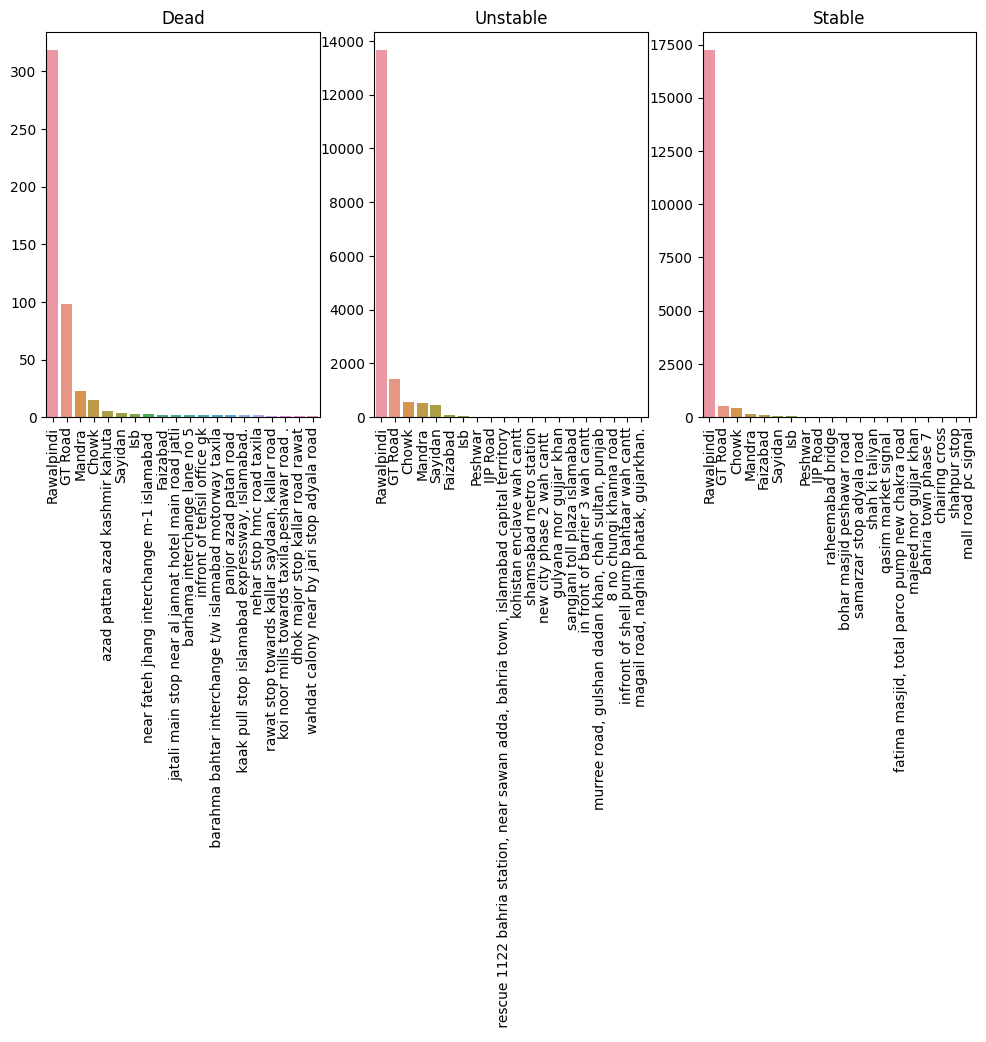

In [217]:
plot_by_status('EmergencyArea', to_encode_dict=to_encode)

In [29]:
rta_dataset[rta_dataset.duplicated()]

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,CallHour,CallDayOfWeek,CallMonth
3042,Rawalpindi,1,Male,20.0,Bike Slip,5.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Noon,3.0,Monsoon
3641,Rawalpindi,1,Male,20.0,Bike Slip,4.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Evening,3.0,Monsoon
4948,Rawalpindi,1,Male,19.0,Car hit Bike,6.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Noon,0.0,Monsoon
13224,Rawalpindi,1,Male,30.0,Bike Slip,5.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Noon,5.0,Monsoon
14865,Rawalpindi,1,Male,18.0,Bike Slip,7.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Noon,1.0,Monsoon
21094,azad pattan azad kashmir kahuta,5,Male,40.0,Bike slipped saving other vehilce,53.0,Illetrate,Head Injury,Over Speed,Dead,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Morning,4.0,Monsoon
21095,azad pattan azad kashmir kahuta,5,Male,40.0,Bike slipped saving other vehilce,53.0,Illetrate,Head Injury,Over Speed,Dead,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Morning,4.0,Monsoon
21096,azad pattan azad kashmir kahuta,5,Male,40.0,Bike slipped saving other vehilce,53.0,Illetrate,Head Injury,Over Speed,Dead,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Morning,4.0,Monsoon
32234,Rawalpindi,1,Male,19.0,Bike hit bike and escaped,4.0,Primary,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Noon,6.0,Winter
32347,Rawalpindi,1,Male,17.0,Bike Slipped,4.0,Matric,Minor,Over Speed,Alive & stable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Noon,5.0,Winter


In [218]:
rta_dataset.drop_duplicates(inplace=True)

In [219]:
rta_dataset[rta_dataset.duplicated()]

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,CallHour,CallDayOfWeek,CallMonth


In [220]:
rta_dataset.describe()

,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,CallDayOfWeek
count,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000,40351.000000
mean,32.773711,6.141063,0.009145,0.970187,0.006518,0.229883,0.001983,0.085822,0.009442,0.002503,0.039726,0.107531,0.009764,2.990607
std,15.194458,4.698391,0.095710,0.558657,0.082898,0.439376,0.044483,0.286231,0.096712,0.049968,0.209521,0.319480,0.099335,1.987516
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,30.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,42.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,118.000000,101.000000,2.000000,10.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,4.000000,2.000000,6.000000


### Tokenize reason column

In [221]:
import nltk
import os
import zipfile
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import regex as re

# Define the download directory for NLTK data
nltk_data_dir = '/kaggle/working/nltk_data'
os.makedirs(nltk_data_dir, exist_ok=True)
nltk.data.path.append(nltk_data_dir)

# Force download the required NLTK data and specify the directory
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('omw-1.4', download_dir=nltk_data_dir)

# Extract wordnet.zip manually
with zipfile.ZipFile(os.path.join(nltk_data_dir, 'corpora', 'wordnet.zip'), 'r') as zip_ref:
    zip_ref.extractall(os.path.join(nltk_data_dir, 'corpora'))

# Initialize WordNet Lemmatizer
wnl = WordNetLemmatizer()

# Example usage, assuming 'Reason' column exists in rta_dataset
rta_dataset['reason_tokenized'] = None

# Process each row in the dataset
for index, row in rta_dataset.iterrows():
    sentence = row['Reason'].lower()
    sentence = re.sub(r'[^a-z]', ' ', sentence)  # Remove all non-alphabet characters

    tokenized_words = word_tokenize(sentence)
    filtered_sentence = [
        wnl.lemmatize(w)
        for w in tokenized_words if w not in stopwords.words('english')
    ]

    # Assign processed values back to the dataset
    rta_dataset.loc[index, 'Reason'] = ','.join(list(set(filtered_sentence)))
    rta_dataset.at[index, 'reason_tokenized'] = filtered_sentence


[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### Looking for the most given reasonings for an accident

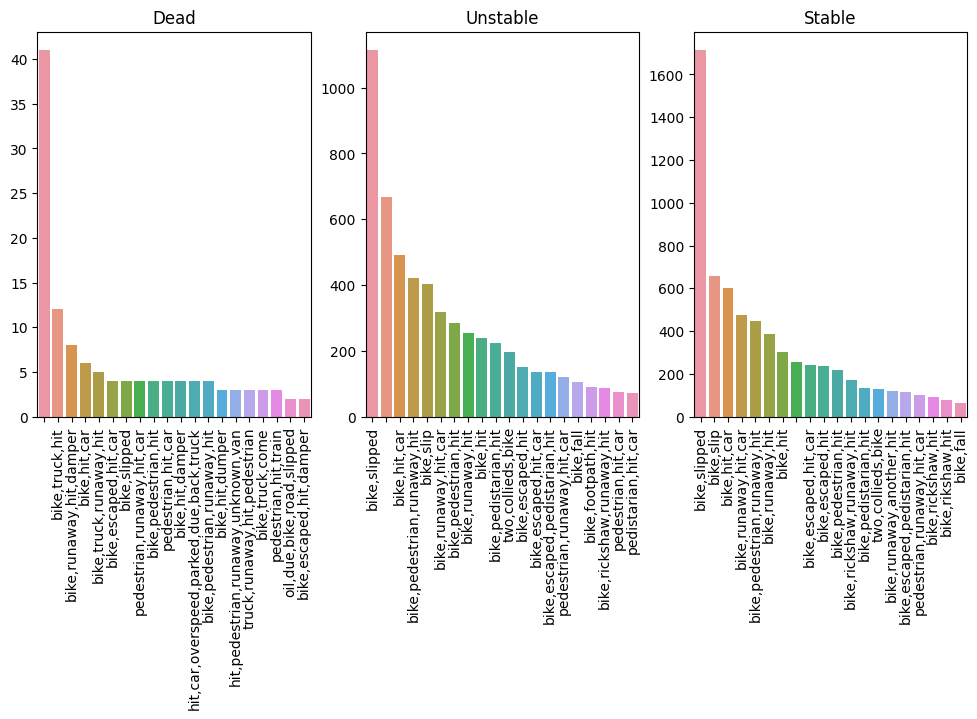

In [222]:
plot_by_status('Reason', to_encode)

#### Vectorize the Reason column

In [223]:
import gensim

w2v_model = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/word2vec/w2v_gn_pretrained.bin', binary=True)

In [224]:
def vectorize(word_list):
  if word_list == None or word_list == []:
    return 0

  vectorized = None

  for word in word_list:
    vectorized = [w2v_model[word] if word in w2v_model else np.zeros(300) for word in word_list]

  vectorized = np.divide(np.sum(vectorized, axis=0), len(vectorized))
  return vectorized

# vectorized = vectorize(['bike', 'hit'])
# print(vectorized)

In [225]:
rta_dataset["reason_tokenized"] = rta_dataset["reason_tokenized"].progress_apply(vectorize)

100%|██████████| 40351/40351 [00:03<00:00, 12706.33it/s]


In [226]:
rta_dataset[rta_dataset["reason_tokenized"].str.len() != 300].index

Index([   51,    55,   190,   219,   221,   353,   579,   589,   764,   872,
       ...
       40099, 40121, 40125, 40131, 40138, 40150, 40152, 40154, 40173, 40187],
      dtype='int64', length=966)

In [227]:
rta_dataset[(rta_dataset["reason_tokenized"].str.len() != 300) & (rta_dataset["PatientStatus"] == "Dead")].shape

(41, 25)

In [228]:
rta_dataset[(rta_dataset["reason_tokenized"].str.len() != 300) & (rta_dataset["PatientStatus"] == "Dead")]

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,PatientStatus,...,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,CallHour,CallDayOfWeek,CallMonth,reason_tokenized
2247,Rawalpindi,2,Male,21.0,,6.0,Masters,Head Injury,Over Speed,Dead,...,0.0,0.0,0.0,0.0,0.0,0.0,Evening,3.0,Winter,0
2898,Rawalpindi,2,Male,22.0,,1.0,Illetrate,Head Injury,Over Speed,Dead,...,0.0,1.0,0.0,0.0,1.0,0.0,Mid Night,2.0,Monsoon,0
3561,Rawalpindi,3,Male,35.0,,1.0,Illetrate,Head Injury,Tyre Burst,Dead,...,0.0,0.0,0.0,1.0,0.0,0.0,Night,0.0,Monsoon,0
4234,Rawalpindi,3,Male,20.0,,10.0,Matric,Head Injury,Over Speed,Dead,...,0.0,0.0,0.0,0.0,0.0,0.0,Evening,5.0,Monsoon,0
8577,Rawalpindi,2,Male,22.0,,6.0,Matric,Head Injury,Over Speed,Dead,...,0.0,0.0,0.0,0.0,1.0,0.0,Evening,3.0,Winter,0
9192,Sayidan,2,Female,40.0,,8.0,Primary,Head Injury,Carelessness,Dead,...,0.0,0.0,0.0,1.0,0.0,0.0,Morning,3.0,Winter,0
9762,Mandra,2,Male,34.0,,3.0,Primary,Head Injury,U Turn,Dead,...,0.0,0.0,0.0,1.0,1.0,0.0,Night,4.0,Winter,0
9950,GT Road,5,Male,62.0,,7.0,Illetrate,Head Injury,Over Speed,Dead,...,1.0,0.0,0.0,0.0,1.0,0.0,Noon,3.0,Winter,0
9982,GT Road,2,Male,30.0,,7.0,Illetrate,Head Injury,U Turn,Dead,...,1.0,0.0,0.0,2.0,0.0,0.0,Morning,4.0,Winter,0
12842,GT Road,3,Male,26.0,,1.0,Illetrate,Multiple Fractures,Over Speed,Dead,...,0.0,0.0,0.0,1.0,1.0,0.0,Noon,3.0,Winter,0


In [229]:
rta_dataset.drop(index=rta_dataset[rta_dataset["reason_tokenized"].str.len() != 300].index, inplace=True, axis="row")
rta_dataset.reset_index(inplace=True)

In [230]:
rta_dataset.columns

Index(['index', 'EmergencyArea', 'TotalPatientsInEmergency', 'Gender', 'Age',
       'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved',
       'CallHour', 'CallDayOfWeek', 'CallMonth', 'reason_tokenized'],
      dtype='object')

In [231]:
rta_dataset[[i for i in range(300)]] = pd.DataFrame(rta_dataset.reason_tokenized.to_list())
print(rta_dataset.shape)

(39385, 326)


### Encoding the values

In [232]:
# label encoder
to_map = {
    'InjuryType':{},
    'Cause':{},
    'EducationTitle':{},
    'PatientStatus':{},
    'CallHour':{},
    'CallMonth':{},
  }

for col in to_map:
    unq = rta_dataset[col].unique()
    to_map[col] = {unq[i]: i for i in range(len(unq))}
    rta_dataset[col] = rta_dataset[col].map(to_map[col])

# Onehot Encoding
rta_dataset = pd.get_dummies(rta_dataset, columns=["Gender"], drop_first=True)

In [233]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rta_dataset["EmergencyArea"] = le.fit_transform(rta_dataset["EmergencyArea"])

In [234]:
rta_dataset.EmergencyArea.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39385 entries, 0 to 39384
Series name: EmergencyArea
Non-Null Count  Dtype
--------------  -----
39385 non-null  int64
dtypes: int64(1)
memory usage: 307.8 KB


In [235]:
rta_dataset.drop(columns=["TotalPatientsInEmergency", "Reason", "responsetime", "reason_tokenized"], axis="columns", inplace=True)

In [236]:
rta_dataset.columns

Index([          'index',   'EmergencyArea',             'Age',
        'EducationTitle',      'InjuryType',           'Cause',
         'PatientStatus', 'BicycleInvovled',   'BikesInvolved',
         'BusesInvolved',
       ...
                     292,               293,               294,
                     295,               296,               297,
                     298,               299,     'Gender_Male',
          'Gender_Other'],
      dtype='object', length=323)

In [132]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

torch.set_default_device('cuda')
device = "cuda"

class MultiTargetNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, out_class):
        super(MultiTargetNN, self).__init__()
        self.shared_layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(hidden_dim, out_class)
        )
    
    def forward(self, x):
        return self.shared_layers(x)

class ANN_Classifier:
    def __init__(
        self, 
        hidden_dim=64, 
        optimizer_class=optim.Adam,
        lr=0.001,
        epochs=100,
        batch_size=128,
        verbose=False,
        patience=10,
        *args,
        **kwargs
    ):
        self.hidden_dim = hidden_dim
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.lr = lr
        self.optimizer_class = optimizer_class
        self.loss_function = nn.CrossEntropyLoss()
        self.patience = patience
        self.checkpoint_path = 'model.pth'

    def fit(self, X_train, y_train):
        X_train = torch.from_numpy(X_train.values.astype(np.float32))
        y_train = torch.from_numpy(y_train.to_numpy().astype(np.int32))
        y_train = y_train.type(torch.LongTensor)
        input_dim = X_train.size(1)
        out_class = len(torch.unique(y_train))
        
        dataset = TensorDataset(
            X_train,
            y_train
        )
        
        data_loader = DataLoader(
            dataset, 
            batch_size=self.batch_size, 
            shuffle=True,
            generator=torch.Generator(device='cuda')
        )

        self.model = MultiTargetNN(input_dim, self.hidden_dim, out_class).to(device)
        self.optimizer = self.optimizer_class(self.model.parameters(), lr=self.lr)
        self.model.train()

        best_loss = float('inf')
        patience_counter = 0
        
        for epoch in range(self.epochs):
            total_loss = 0
            correct_predictions = 0
            total_samples = 0
            for X_batch, y_batch in data_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                self.optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = self.loss_function(outputs, y_batch)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                correct_predictions += (predicted == y_batch).sum().item()
                total_samples += y_batch.size(0)
            
            avg_loss = total_loss / len(data_loader)
            accuracy = correct_predictions / total_samples
            
            if self.verbose:
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

            if avg_loss < best_loss:
                best_loss = avg_loss
                patience_counter = 0
                torch.save(self.model.state_dict(), self.checkpoint_path)
            else:
                patience_counter += 1
            
            if patience_counter >= self.patience:
                # Load the best model at the end of training
                self.model.load_state_dict(torch.load(self.checkpoint_path))
                print("Early stopping triggered.")
                break

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X = torch.from_numpy(X.values.astype(np.float32))
            X = X.to(device)
            outputs = self.model(X)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.cpu().numpy()


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

def plot_solver_iter(dataset):
    # Targets
    targets = ["PatientStatus", "InjuryType"]
    
    # Prepare data
    X = dataset.drop(columns=["index"], axis="columns")
    y = dataset[targets]
    
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
        X, 
        y,
        test_size=0.25,
        shuffle=True,
        stratify=y
    )

    X_train_i.columns = X_train_i.columns.astype(str)
    X_test_i.columns = X_test_i.columns.astype(str)
    
    # Initialize empty dataframes to store the results
    default_results_df = pd.DataFrame(columns=["Model", "Target", "Accuracy", "Precision", "Recall", "F1 Score"])
    tuned_results_df = pd.DataFrame(columns=["Model", "Target", "Parameters", "Accuracy", "Precision", "Recall", "F1 Score"])

    # Define models and their hyperparameters
    models = {
        "MulticlassANN": [ANN_Classifier()],
        "Decision Tree": [DecisionTreeClassifier()],
        "SVM": [SVC()],
        "Random Forest": [RandomForestClassifier()],
        "XGBoost": [xgb.XGBClassifier()],
        "LogisticRegression": [LogisticRegression()]
    }

    tuned_models = {
        "MulticlassANN": [
            {"epoch": 50},
            {"epoch": 100},
            {"epoch": 150},
            {"lr": 0.1},
            {"lr": 0.01},
            {"lr": 0.15},
            {"lr": 0.001},
            {"batch_size": 32},
            {"batch_size": 64},
            {"batch_size": 128},
            {"hidden_dim": 64},
            {"hidden_dim": 128},
            {"hidden_dim": 256},
        ],
        "Decision Tree": [
            {"max_depth": 4}, 
            {"max_depth": 5}, 
            {"max_depth": 6}, 
            {"max_depth": 7}, 
            {"max_depth": 8}, 
            {"max_depth": 9}
        ],
        "SVM": [
            {"kernel": "linear"}, 
            {"kernel": "poly"}, 
            {"kernel": "rbf"}, 
            {"kernel": "sigmoid"}
        ],
        "Random Forest": [
            {"n_estimators": 10}, 
            {"n_estimators": 50}, 
            {"n_estimators": 100}, 
            {"n_estimators": 200}
        ],
        "XGBoost": [
            {"learning_rate": 0.001}, 
            {"learning_rate": 0.01}, 
            {"learning_rate": 0.1}, 
            {"learning_rate": 1}
        ],
        "LogisticRegression": [
            {"solver": 'lbfgs'}, 
            {"solver": 'liblinear'}, 
            {"solver": 'newton-cg'}, 
            {"solver": 'newton-cholesky'}, 
            {"solver": 'sag'}, 
            {"solver": 'saga'},
            {"max_iter": 50}, 
            {"max_iter": 100},
            {"max_iter": 150}, 
            {"max_iter": 200}, 
            {"max_iter": 250},
            {"max_iter": 300}, 
        ]
    }

    # Loop through targets
    for target in targets:
        print(f"========{target}=========")
        
        # Benchmark Default Models (no parameters)
        for model_name, model_list in models.items():
            for model in model_list:
                X_train = X_train_i.drop(columns=[target], axis="columns")
                y_train = y_train_i[target]
                X_test = X_test_i.drop(columns=[target], axis="columns")
                y_test = y_test_i[target]

                # Train the model
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                
                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                # Create a new result row
                default_result = pd.DataFrame({
                    "Model": [model_name], 
                    "Target": [target], 
                    "Accuracy": [accuracy], 
                    "Precision": [precision], 
                    "Recall": [recall], 
                    "F1 Score": [f1]
                })
                
                # Concatenate the new row to the DataFrame
                default_results_df = pd.concat([default_results_df, default_result], ignore_index=True)

                # Print results
                print(f"Model: {model_name} - Default")
                print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
                print(confusion_matrix(y_test, y_pred))
        
        # Benchmark Tuned Models (with hyperparameters)
        for model_name, hyperparameter_list in tuned_models.items():
            for params in hyperparameter_list:
                model = models[model_name][0].__class__(**params)  # Create a model with the specific hyperparameters
                    
                X_train = X_train_i.drop(columns=[target], axis="columns")
                y_train = y_train_i[target]
                X_test = X_test_i.drop(columns=[target], axis="columns")
                y_test = y_test_i[target]

                # Train the model
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                
                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                # Create a new result row
                tuned_result = pd.DataFrame({
                    "Model": [model_name], 
                    "Target": [target], 
                    "Parameters": [params], 
                    "Accuracy": [accuracy], 
                    "Precision": [precision], 
                    "Recall": [recall], 
                    "F1 Score": [f1]
                })
                
                # Concatenate the new row to the DataFrame
                tuned_results_df = pd.concat([tuned_results_df, tuned_result], ignore_index=True)

                # Print results
                print(f"Model: {model_name} - Tuned with {params}")
                print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
                print(confusion_matrix(y_test, y_pred))

    return default_results_df, tuned_results_df

    # You can also plot the results if needed, e.g., plotting accuracy vs model or hyperparameter, etc.


In [134]:
default, tuned = plot_solver_iter(rta_dataset)

========PatientStatus=========
Model: MulticlassANN - Default
Accuracy: 0.7197, Precision: 0.7215, Recall: 0.7197, F1: 0.7170
[[2996 1665   32]
 [ 988 4031    0]
 [  72    3   60]]
Model: Decision Tree - Default
Accuracy: 0.6339, Precision: 0.6345, Recall: 0.6339, F1: 0.6342
[[2916 1691   86]
 [1752 3263    4]
 [  66    6   63]]
Model: SVM - Default
Accuracy: 0.5253, Precision: 0.5382, Recall: 0.5253, F1: 0.4301
[[ 536 4157    0]
 [ 382 4637    0]
 [  18  117    0]]
Model: Random Forest - Default
Accuracy: 0.7001, Precision: 0.7005, Recall: 0.7001, F1: 0.6972
[[3172 1515    6]
 [1316 3703    0]
 [ 114    2   19]]
Model: XGBoost - Default
Accuracy: 0.7299, Precision: 0.7330, Recall: 0.7299, F1: 0.7268
[[3007 1661   25]
 [ 898 4121    0]
 [  72    4   59]]
Model: LogisticRegression - Default
Accuracy: 0.6960, Precision: 0.7092, Recall: 0.6960, F1: 0.6780
[[2345 2348    0]
 [ 510 4509    0]
 [ 132    3    0]]
Model: MulticlassANN - Tuned with {'epoch': 50}
Accuracy: 0.7149, Precision: 0.7

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_performance_for_targets(tuned_results_df):
    targets = ["PatientStatus", "InjuryType"]
    
    # Create the subplots grid: 2 columns and 7 rows for each target
    fig, axs = plt.subplots(8, 2, figsize=(10, 20))  # Adjust size to accommodate 14 subplots
    
    for target_index, target in enumerate(targets):
        # Iterate over each model type and plot 4 subplots per target
        for model_index, model in enumerate(['Decision Tree', 'SVM', 'Random Forest', 'XGBoost', "MulticlassANN"]):
            if model == 'Decision Tree':
                ax = axs[model_index, target_index]
                model_results = tuned_results_df[tuned_results_df['Model'] == 'Decision Tree']
                model_results = model_results[model_results['Parameters'].apply(lambda x: 'max_depth' in x)]
                model_results['Max_depth'] = model_results['Parameters'].apply(lambda x: x['max_depth'])
                sns.lineplot(data=model_results[model_results['Target'] == target], x='Max_depth', y='Accuracy', marker='o', color='blue', ax=ax)
                ax.set_title(f'Decision Tree: Accuracy vs Max_depth ({target})')
                ax.set_xlabel('Max Depth')
                ax.set_ylabel('Accuracy')

            elif model == 'SVM':
                ax = axs[model_index, target_index]
                model_results = tuned_results_df[tuned_results_df['Model'] == 'SVM']
                model_results = model_results[model_results['Parameters'].apply(lambda x: 'kernel' in x)]
                model_results['Kernel'] = model_results['Parameters'].apply(lambda x: x['kernel'])
                sns.lineplot(data=model_results[model_results['Target'] == target], x='Kernel', y='Accuracy', marker='o', color='green', ax=ax)
                ax.set_title(f'SVM: Accuracy vs Kernel ({target})')
                ax.set_xlabel('Kernel')
                ax.set_ylabel('Accuracy')

            elif model == 'Random Forest':
                ax = axs[model_index, target_index]
                model_results = tuned_results_df[tuned_results_df['Model'] == 'Random Forest']
                model_results = model_results[model_results['Parameters'].apply(lambda x: 'n_estimators' in x)]
                model_results['N_estimators'] = model_results['Parameters'].apply(lambda x: x['n_estimators'])
                sns.lineplot(data=model_results[model_results['Target'] == target], x='N_estimators', y='Accuracy', marker='o', color='red', ax=ax)
                ax.set_title(f'Random Forest: Accuracy vs N_estimators ({target})')
                ax.set_xlabel('N Estimators')
                ax.set_ylabel('Accuracy')

            elif model == 'XGBoost':
                ax = axs[model_index, target_index]
                model_results = tuned_results_df[tuned_results_df['Model'] == 'XGBoost']
                model_results = model_results[model_results['Parameters'].apply(lambda x: 'learning_rate' in x)]
                model_results['Learning_rate'] = model_results['Parameters'].apply(lambda x: x['learning_rate'])
                sns.lineplot(data=model_results[model_results['Target'] == target], x='Learning_rate', y='Accuracy', marker='o', color='purple', ax=ax)
                ax.set_title(f'XGBoost: Accuracy vs Learning_rate ({target})')
                ax.set_xlabel('Learning Rate')
                ax.set_ylabel('Accuracy')

            elif model == "MulticlassANN":
                # Batch Size Plot
                ax = axs[model_index, target_index]
                model_results = tuned_results_df[tuned_results_df['Model'] == "MulticlassANN"]
                model_results = model_results[model_results['Parameters'].apply(lambda x: 'batch_size' in x)]
                model_results['Batch_Size'] = model_results['Parameters'].apply(lambda x: x['batch_size'])
                sns.lineplot(data=model_results[model_results['Target'] == target], x='Batch_Size', y='Accuracy', marker='o', color='orange', ax=ax)
                ax.set_title(f'ANN: Accuracy vs Batch Size ({target})')
                ax.set_xlabel('Batch Size')
                ax.set_ylabel('Accuracy')
                
                # Learning Rate Plot
                ax = axs[model_index + 1, target_index]
                model_results = tuned_results_df[tuned_results_df['Model'] == "MulticlassANN"]
                model_results = model_results[model_results['Parameters'].apply(lambda x: 'lr' in x)]
                model_results['Learning_rate'] = model_results['Parameters'].apply(lambda x: x['lr'])
                sns.lineplot(data=model_results[model_results['Target'] == target], x='Learning_rate', y='Accuracy', marker='o', color='orange', ax=ax)
                ax.set_title(f'ANN: Accuracy vs Learning Rate ({target})')
                ax.set_xlabel('Learning Rate')
                ax.set_ylabel('Accuracy')

                # Hidden Dimensions Plot
                ax = axs[model_index + 2, target_index]
                model_results = tuned_results_df[tuned_results_df['Model'] == "MulticlassANN"]
                model_results = model_results[model_results['Parameters'].apply(lambda x: 'hidden_dim' in x)]
                model_results['Hidden_Dim'] = model_results['Parameters'].apply(lambda x: x['hidden_dim'])
                sns.lineplot(data=model_results[model_results['Target'] == target], x='Hidden_Dim', y='Accuracy', marker='o', color='orange', ax=ax)
                ax.set_title(f'ANN: Accuracy vs Hidden Dimensions ({target})')
                ax.set_xlabel('Hidden Dimensions')
                ax.set_ylabel('Accuracy')

                # Epochs Plot
                ax = axs[model_index + 3, target_index]
                model_results = tuned_results_df[tuned_results_df['Model'] == "MulticlassANN"]
                model_results = model_results[model_results['Parameters'].apply(lambda x: 'epoch' in x)]
                model_results['Epoch'] = model_results['Parameters'].apply(lambda x: x['epoch'])
                sns.lineplot(data=model_results[model_results['Target'] == target], x='Epoch', y='Accuracy', marker='o', color='orange', ax=ax)
                ax.set_title(f'ANN: Accuracy vs Epochs ({target})')
                ax.set_xlabel('Epochs')
                ax.set_ylabel('Accuracy')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()


#### Default

In [242]:
default

,Model,Target,Accuracy,Precision,Recall,F1 Score
0,MulticlassANN,PatientStatus,0.719712,0.721498,0.719712,0.717046
1,Decision Tree,PatientStatus,0.633899,0.634523,0.633899,0.634170
2,SVM,PatientStatus,0.525338,0.538151,0.525338,0.430099
3,Random Forest,PatientStatus,0.700112,0.700491,0.700112,0.697210
4,XGBoost,PatientStatus,0.729867,0.733005,0.729867,0.726773
5,LogisticRegression,PatientStatus,0.696050,0.709176,0.696050,0.677984
6,MulticlassANN,InjuryType,0.769067,0.699281,0.769067,0.680039
7,Decision Tree,InjuryType,0.668630,0.682692,0.668630,0.675424
8,SVM,InjuryType,0.759419,0.576717,0.759419,0.655577
9,Random Forest,InjuryType,0.746623,0.664370,0.746623,0.686584


In [243]:
tuned

,Model,Target,Parameters,Accuracy,Precision,Recall,F1 Score
0,MulticlassANN,PatientStatus,{'epoch': 50},0.714939,0.714397,0.714939,0.713524
1,MulticlassANN,PatientStatus,{'epoch': 100},0.713212,0.728588,0.713212,0.704156
2,MulticlassANN,PatientStatus,{'epoch': 150},0.720524,0.729202,0.720524,0.715044
3,MulticlassANN,PatientStatus,{'lr': 0.1},0.509698,0.259792,0.509698,0.344165
4,MulticlassANN,PatientStatus,{'lr': 0.01},0.704479,0.702935,0.704479,0.693472
...,...,...,...,...,...,...,...
81,LogisticRegression,InjuryType,{'max_iter': 100},0.759419,0.576717,0.759419,0.655577
82,LogisticRegression,InjuryType,{'max_iter': 150},0.758708,0.618163,0.758708,0.657942
83,LogisticRegression,InjuryType,{'max_iter': 200},0.758708,0.623116,0.758708,0.657723
84,LogisticRegression,InjuryType,{'max_iter': 250},0.756372,0.623950,0.756372,0.662651


#### Hyper Parameter tune

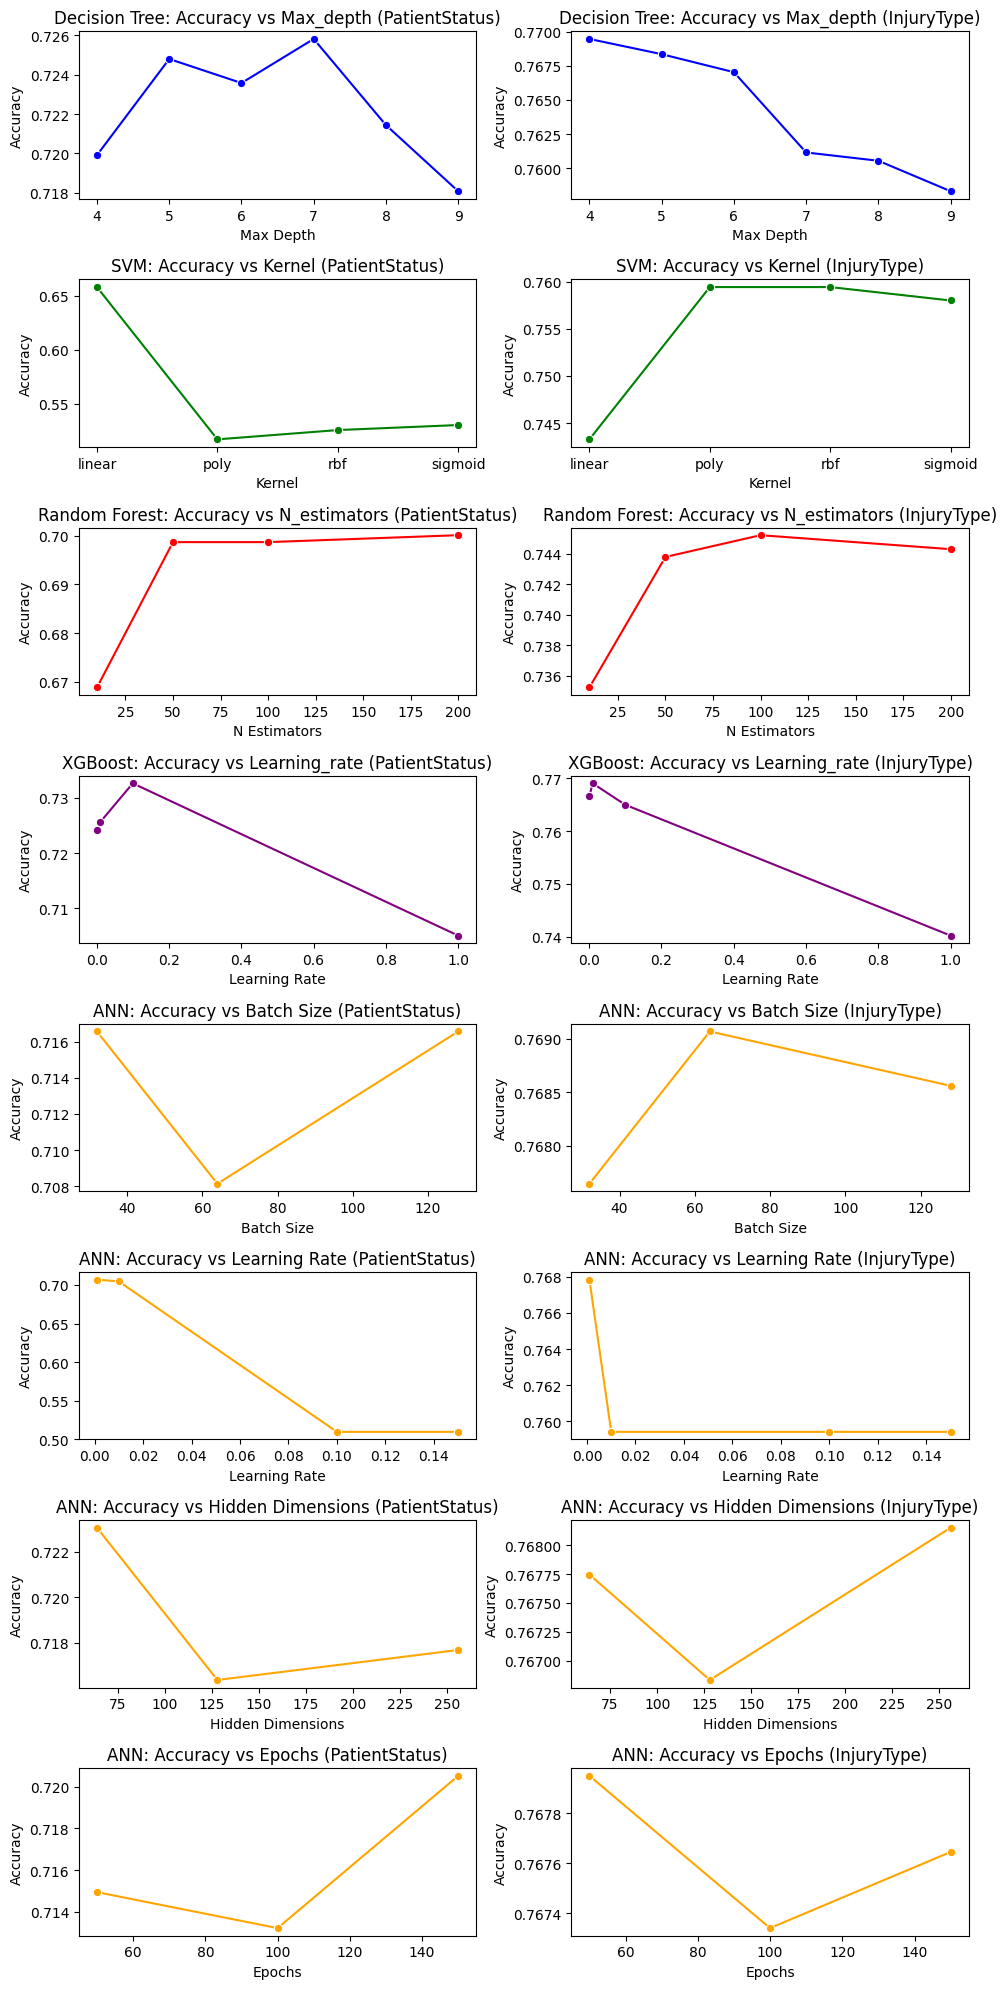

In [244]:
plot_model_performance_for_targets(tuned)

In [142]:
default.to_csv("Default_Param.csv")
tuned.to_csv("Tuned_Params.csv")